In [89]:
import os
import numpy as np
import seaborn as sns
from itertools import product
from biotite.structure.io.pdb import PDBFile

In [7]:
file = PDBFile.read("1sa3.pdb")

In [26]:
array_stack = file.get_structure()
atoms = array_stack[0]

In [53]:
curr_res_id = 0
dna_atoms = []
curr_dna_atom = []
dna = ""

In [55]:
for atom in atoms:
    # only process DNA atoms
    if not atom.res_name.startswith('D'):
        break
        
    # proceeding to next nucleotide
    if atom.res_id != curr_res_id:
        curr_res_id = atom.res_id
        # append point clouds to list
        if len(curr_dna_atom):
            dna_atoms.append(curr_dna_atom)
            curr_dna_atom = []
            dna += atom.res_name[-1]
    
    # add point to point cloud
    else:
        curr_dna_atom.append(atom.coord)       

In [57]:
curr_res_id = 0
aa_atoms = []
curr_aa_atom = []
aa = []

In [58]:
for atom in atoms:
    # only process AA atoms
    if atom.res_name.startswith('D'):
        continue
        
    # proceeding to next aa
    if atom.res_id != curr_res_id:
        curr_res_id = atom.res_id
        # append point clouds to list
        if len(curr_aa_atom):
            aa_atoms.append(curr_aa_atom)
            curr_aa_atom = []
            aa.append(atom.res_name)
    
    # add point to point cloud
    else:
        curr_aa_atom.append(atom.coord)

In [60]:
len(aa_atoms)

524

In [76]:
def dist(x, y):
    return np.linalg.norm(x - y)

In [77]:
def cloud_dist(xs, ys):
    return min([dist(x, y) for x, y in product(xs, ys)])

In [111]:
dist_matrix = np.zeros((len(aa_atoms), len(dna_atoms)))
for i, res in enumerate(aa_atoms):
    for j, nuc in enumerate(dna_atoms):
        dist_matrix[i][j] = cloud_dist(res, nuc)

In [112]:
dist_matrix

array([[36.16645813, 34.24144745, 30.24845886, ..., 29.89829254,
        30.99212646, 35.91604614],
       [30.80387306, 29.75410843, 26.83372307, ..., 33.29129028,
        34.41779327, 39.10958862],
       [36.70763779, 34.55794907, 30.70191956, ..., 33.57147598,
        34.99105835, 40.14112854],
       ...,
       [41.82858658, 39.76173782, 37.20285797, ..., 13.10864449,
        15.25936031, 17.2994976 ],
       [38.84326172, 36.75385666, 34.05149078, ..., 10.1286478 ,
        13.48535347, 16.79297447],
       [39.15153885, 36.84699631, 34.59276962, ..., 16.58478165,
        18.8674736 , 21.52873993]])

In [91]:
dist_matrix.shape

(524, 71)

<AxesSubplot: >

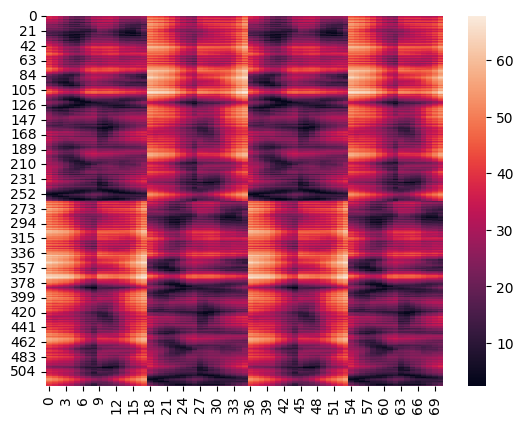

In [90]:
sns.heatmap(dist_matrix)

In [101]:
distances = dist_matrix.flatten().tolist()

In [103]:
sorted(distances)

[2.4882826805114746,
 2.4882826805114746,
 2.5839593410491943,
 2.5839593410491943,
 2.595465660095215,
 2.595465660095215,
 2.6778786182403564,
 2.6778786182403564,
 2.700025796890259,
 2.700025796890259,
 2.7117576599121094,
 2.7117576599121094,
 2.729147434234619,
 2.729147434234619,
 2.729297637939453,
 2.729297637939453,
 2.742353677749634,
 2.742353677749634,
 2.748771905899048,
 2.748771905899048,
 2.754534959793091,
 2.754534959793091,
 2.757737159729004,
 2.757737159729004,
 2.7948596477508545,
 2.7948596477508545,
 2.830092668533325,
 2.830092668533325,
 2.8904569149017334,
 2.8904569149017334,
 2.8983101844787598,
 2.8983101844787598,
 2.8986880779266357,
 2.8986880779266357,
 2.9312775135040283,
 2.9312775135040283,
 2.9340202808380127,
 2.9340202808380127,
 2.939453363418579,
 2.939453363418579,
 2.9446845054626465,
 2.9446845054626465,
 2.9635262489318848,
 2.9635262489318848,
 3.0060319900512695,
 3.0060319900512695,
 3.048567533493042,
 3.048567533493042,
 3.06080794334

<AxesSubplot: >

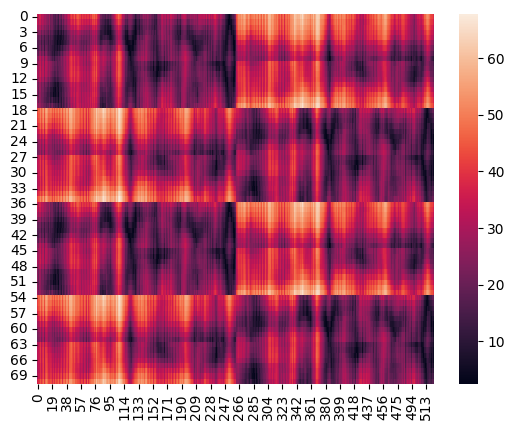

In [107]:
sns.heatmap(dist_matrix.transpose())

In [108]:
cutoff = 3.0
dist_matrix_cutoff = dist_matrix.copy()
dist_matrix_cutoff[dist_matrix_cutoff > cutoff] = 100.0